# Random Forest

In [91]:
#Upload Packages and data
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from error_metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('mushroom.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [92]:
#Data Cleaning
#Number of rows before
print("Before cleaning. Rows =",str(len(data)))

#Drop the values in the previously stated columns
data = data[data['cap-shape'] != 'c']
data = data[data['cap-surface'] != 'g']
data = data[data['stalk-color-above-ring'] != 'y']
data = data[data['veil-color'] != 'y']

#Number of rows
print("After cleaning. Rows =",str(len(data)))

#Drop veil-type
data = data.drop('veil-type',axis=1)

#Replace ? with u in stalk-root
data = data.replace(to_replace ="?", value ="u") 

Before cleaning. Rows = 8124
After cleaning. Rows = 8111


In [93]:
#Preping data for Random Forest

#Removing the target variable
features = list(data)
features.remove('class')
data_x = data[features]
data_y = data['class']

#Convert Class to 1 and 0 and OneHotEncode other columns to 1 and 0
data_y.replace({'e':0,'p':1}, inplace=True)
data_x = pd.get_dummies(data_x) 

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

## Creating the random forest

In [102]:
#Random Forest
# Buils a sequence of Random Forest models for different n_est and depth values
n_ests = [5, 8, 10, 20, 50, 100] 
    #Number of estimators meaning the number of 'trees' being considores for the model
depths = [2, 4, 6, 8, 20] 
    #How deep are the trees meaning how many variables are considered in building a single tree

#Create a dataframe containing n_ests, depth, and accuracy so it can be plotted
ne = []
dep = []
acc = []
variableNames = list(x_train.columns)
counter = [0]*len(list(x_train.columns))
variableImportanceTracker = {'variable': list(x_train.columns)}
variableScoreTracker = []
for n in n_ests:
    for dp in depths:
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        print('------ Evaluating model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        print_binary_classif_error_report(y_test, y_hat)
        ne.append(n)
        dep.append(dp)
        acc.append(accuracy_score(y_test, y_hat))
        
        print('------ Important features model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        importanceScoreRF = [] #create a list to hold the score
        importance = mod.feature_importances_ # get the measured importance
        #Get a list of the importance scores
        for i,v in enumerate(importance):
            importanceScoreRF.append(v)
        #Record the number of times a variable is considered significant
        for i in range(len(importanceScoreRF)):
            if importanceScoreRF[i] > 0:
                counter[i] += 1
        #Add the scores to a list which will be used to create a dataframe of variable scores
        importanceScoreRF.append(n)
        importanceScoreRF.append(dp)
        variableScoreTracker.append(importanceScoreRF)

------ Evaluating model: n_estimators =5, max_depth = 2 ------
Accuracy: 0.9215283483976993
Precision: 0.8761329305135952
Recall: 0.9772535804549284
F1: 0.9239346873755476
ROC AUC: 0.9228689714624282
Confusion Matrix: 
[[1083  164]
 [  27 1160]]
------ Important features model: n_estimators =5, max_depth = 2 ------
------ Evaluating model: n_estimators =5, max_depth = 4 ------
Accuracy: 0.961380443714051
Precision: 1.0
Recall: 0.9208087615838247
F1: 0.9587719298245614
ROC AUC: 0.9604043807919124
Confusion Matrix: 
[[1247    0]
 [  94 1093]]
------ Important features model: n_estimators =5, max_depth = 4 ------
------ Evaluating model: n_estimators =5, max_depth = 6 ------
Accuracy: 0.9938373048479868
Precision: 0.9932659932659933
Recall: 0.9941027801179444
F1: 0.9936842105263157
ROC AUC: 0.993843691582629
Confusion Matrix: 
[[1239    8]
 [   7 1180]]
------ Important features model: n_estimators =5, max_depth = 6 ------
------ Evaluating model: n_estimators =5, max_depth = 8 ------
Acc

------ Evaluating model: n_estimators =100, max_depth = 20 ------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Confusion Matrix: 
[[1247    0]
 [   0 1187]]
------ Important features model: n_estimators =100, max_depth = 20 ------


## Using the data gathered from the random forest we create a few dataframes that can be used for graphing

In [103]:
#Measuring Quality Of The Model

#Create a dataframe containing n_estimators, max_depth, and accuracy
accMeasure = {'n_ests':ne,'depths':dep,"accuracy":acc}
accMeasure = pd.DataFrame(accMeasure)
accMeasure.sort_values(by=['accuracy'], ascending=False).head()

,n_ests,depths,accuracy
29,100,20,1.0
24,50,20,1.0
3,5,8,1.0
4,5,20,1.0
28,100,8,1.0


In [104]:
#Measuring The Significance Of Predictors

#Create a dataframe that has the variable name and the number of times it is considered significant out of 30
variableImportanceTracker['counter'] = counter
variableImportanceTracker = pd.DataFrame(variableImportanceTracker)
variableImportanceTracker.sort_values(by=['counter'], ascending=False).head(15)

,variable,counter
25,odor_n,30
34,gill-size_n,29
33,gill-size_b,29
22,odor_f,28
35,gill-color_b,28
55,stalk-surface-above-ring_k,28
103,population_v,27
95,spore-print-color_r,27
89,ring-type_p,27
32,gill-spacing_w,27


In [105]:
#Measuring the percent significance of a predictor by number of estimates and depth

#Create a dataframe containing the significance scores of each of the variables as well as the number of estimates and the depth where they were considered significant
scoreColumns = list(x_train.columns)
scoreColumns.append('n_estimates')
scoreColumns.append('depth')

variableScoreTracker = pd.DataFrame(variableScoreTracker, columns = scoreColumns)
variableScoreTracker.head()

,cap-shape_b,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,...,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,n_estimates,depth
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.027508,0.0,0.000000,0.000000,5,2
1,0.000616,0.000039,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000146,0.000000,0.0,...,0.000000,0.000394,0.000000,0.000000,0.010561,0.0,0.000000,0.000000,5,4
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4.729762e-07,0.001092,0.009950,0.0,...,0.001584,0.002824,0.012019,0.000000,0.000000,0.0,0.000000,0.003494,5,6
3,0.000000,0.000000,0.000000,0.0,0.000730,0.011042,1.302206e-02,0.000049,0.001590,0.0,...,0.000000,0.009811,0.001502,0.000004,0.004863,0.0,0.000000,0.000000,5,8
4,0.000300,0.000057,0.000042,0.0,0.000267,0.024097,6.088942e-05,0.000264,0.000543,0.0,...,0.000733,0.000241,0.008401,0.000784,0.000000,0.0,0.006469,0.000000,5,20


## Using the Dataframes now we can graph!

### Graph Accuracy by depth and num estimates

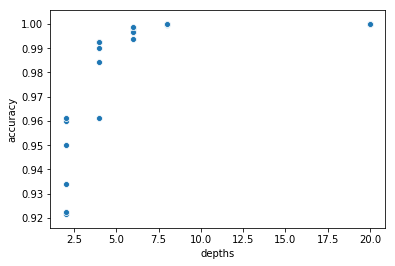

In [106]:
#Plotting the depth/# of variables vs the accuracy
sns.scatterplot(x="depths", y="accuracy", data=accMeasure)

#Summary: More variables means more accuracy but there is a danger of overfitting

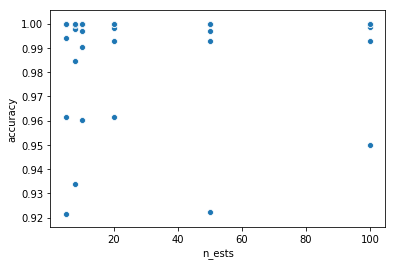

In [107]:
#Plotting the number of estimates/trees vs the accuracy
sns.scatterplot(x="n_ests", y="accuracy", data=accMeasure)

#Summary: More trees doesn't necessarily mean more accuracy

### Graph the number of times a variable is considered significant

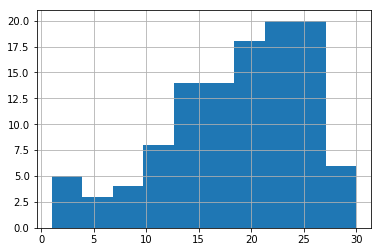

In [108]:
#Out of 30 random forests how many times was a particular variable considered significant?
variableImportanceTracker['counter'].hist()

### Plotting Importance Scores against number of estimates and depth

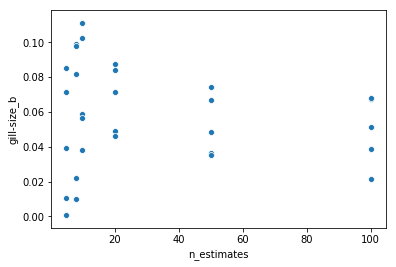

In [84]:
#Plotting the number of estimates/trees vs the score of gill-size_b
sns.scatterplot(x="n_estimates", y="gill-size_b", data=variableScoreTracker)

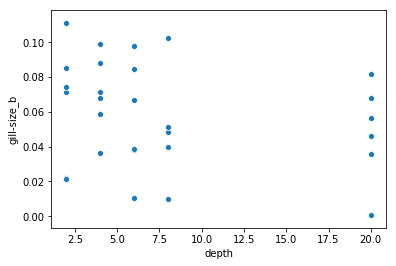

In [85]:
#Plotting the depth vs the score of gill-size_b
sns.scatterplot(x="depth", y="gill-size_b", data=variableScoreTracker)

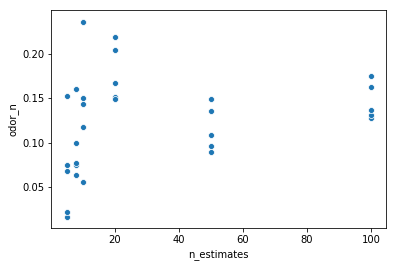

In [86]:
#Plotting the number of estimates/trees vs the score of odor_n
sns.scatterplot(x="n_estimates", y="odor_n", data=variableScoreTracker)

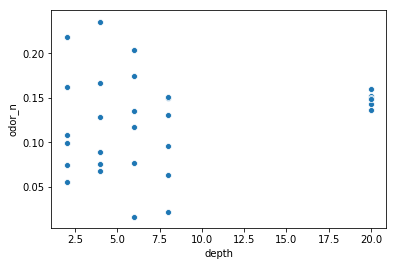

In [87]:
#Plotting the depth vs the score of odor_n
sns.scatterplot(x="depth", y="odor_n", data=variableScoreTracker)

In [109]:
#Note that when a group of variables are considered significant the sum of all of the variables' significance scores is 1
variableScoreTracker.iloc[:, :-2].sum(axis = 1)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64